In [1]:
import numpy as np
import pandas as pd

# 1. Regression Modelling

In [2]:
# Import and preview
file = '/Users/darionguan/Desktop/AIR Coding Assessment/Iris_Data.csv'
iris_df = pd.read_csv(file)
iris_df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### a) How many irises belong to each species?

In [3]:
iris_df.Labels.value_counts()

0    50
1    50
2    50
Name: Labels, dtype: int64

#### There are 50 in irises in species. The species are 0, 1, and 2.

### b) Make a scatterplot of petal length vs sepal length. Color the dots according to species. Document your observations (2-3 sentences)

In [4]:
import matplotlib.pyplot as plt

In [5]:
list(iris_df.columns)

# Rename due to extra space in Petal Length column name
iris_df = iris_df.rename(columns={' Petal Length': 'Petal Length'})

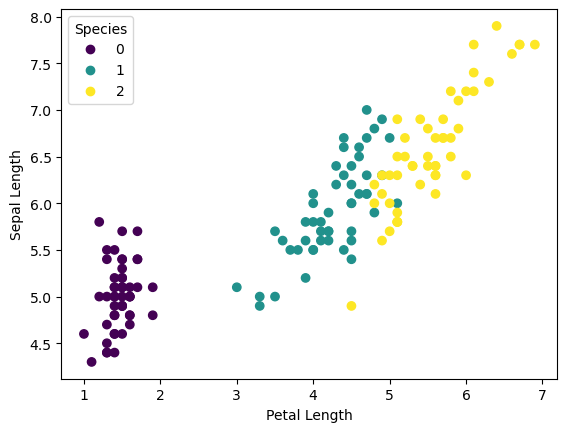

In [6]:
fig, ax = plt.subplots()
scatter = ax.scatter(iris_df['Petal Length'], iris_df['Sepal Length'], c=iris_df.Labels)
legend1 = ax.legend(*scatter.legend_elements(), loc = 'upper left', title = 'Species')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')

plt.show()

#### As petal length increases, sepal length tends to increase as well. Species 2 has the longest petal length, with species 1 coming in second, and species 0 having the shortest petal length. Species 1 and 2 have more overlapping lengths whereas species 0 is noticeably shorter.

### c) Fit a regression model predicting sepal length based on petal length, petal width and sepal width (you do not need to test any of the regression assumptions).

In [7]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [8]:
y = iris_df['Sepal Length']
X = iris_df[['Petal Length', 'Petal Width', 'Sepal Width']]
regr = LinearRegression().fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 1.8450608032166098
Coefficients: 
 [ 0.71106291 -0.56256786  0.65486424]


In [9]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sepal Length   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     297.0
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           6.28e-62
Time:                        12:42:49   Log-Likelihood:                -37.000
No. Observations:                 150   AIC:                             82.00
Df Residuals:                     146   BIC:                             94.04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.8451      0.250      7.368      0.000       1.350       2.340
Petal Length     0.7111      0.057     12.560      0.000       0.599       0.823
Petal Width     -0.5626      0.127     -4.426      0.000      -0.814      -0.311
Sepal Width      0.6549      0.067      9.823      0.000       0.523       0.787
==============================================================================
Omnibus:                        0.265   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.876   Jarque-Bera (JB):                0.432
Skew:                           0.003   Prob(JB):                        0.806
Kurtosis:                       2.737   Cond. No.                         54.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### d) Describe the results of your regression, focusing on the relationship between sepal length and petal length.

##### We interpret our intercept and coefficients output as:
#### Sepal length = (1.8451) + (0.7111)*X1 + (-0.5626)*X2 + (0.6549)*X3 where X1 = petal length, X2 = petal width, X3 = sepal width

#### The R-squared is 0.859 which indicates that our model explains 85.9% of the variability in sepal lengths. Additionally the Prob (F-statistic) is low (6.28e-62), so we have sufficient evidence to conclude that our model is significant and outperforms a model with no independent variables.
#### Focusing solely on the relationship between sepal length and petal length, we can see that that each unit increased in petal length is associated with a 0.7111 unit increase in sepal length. This relationship is statistically significant since the petal length's p-value < 0.05.

### e) Extra Credit: Fit a regression model predicting sepal length based on petal length, petal width, sepal width and species (you do not need to test for any of the "classical" regression assumptions). This is the same as part c but also with species as a predictor. Describe the results.

In [10]:
# Create binary dummy variables for the categorical variables
df_dummies = pd.get_dummies(iris_df.Labels, prefix='Label').iloc[:, 1:]
df_dummies

# 0, 0 = Label 0
# 1, 0 = Label 1
# 0, 1 = Label 2

,Label_1,Label_2
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145,0,1
146,0,1
147,0,1
148,0,1


In [11]:
# Concatenate columns
iris_df = pd.concat([iris_df, df_dummies], axis=1)
iris_df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Labels,Label_1,Label_2
0,5.1,3.5,1.4,0.2,0,0,0
1,4.9,3.0,1.4,0.2,0,0,0
2,4.7,3.2,1.3,0.2,0,0,0
3,4.6,3.1,1.5,0.2,0,0,0
4,5.0,3.6,1.4,0.2,0,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0,1
146,6.3,2.5,5.0,1.9,2,0,1
147,6.5,3.0,5.2,2.0,2,0,1
148,6.2,3.4,5.4,2.3,2,0,1


In [12]:
y = iris_df['Sepal Length']
X = iris_df[['Petal Length', 'Petal Width', 'Sepal Width', 'Label_1', 'Label_2']]
regr = LinearRegression().fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 2.1585755410099265
Coefficients: 
 [ 0.82878689 -0.32210351  0.50107481 -0.71407565 -1.00961511]


In [13]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sepal Length   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     188.8
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           2.22e-61
Time:                        12:42:49   Log-Likelihood:                -32.367
No. Observations:                 150   AIC:                             76.73
Df Residuals:                     144   BIC:                             94.80
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.1586      0.279      7.726      0.000       1.606       2.711
Petal Length     0.8288      0.068     12.136      0.000       0.694       0.964
Petal Width     -0.3221      0.151     -2.129      0.035      -0.621      -0.023
Sepal Width      0.5011      0.086      5.816      0.000       0.331       0.671
Label_1         -0.7141      0.240     -2.974      0.003      -1.189      -0.239
Label_2         -1.0096      0.334     -3.022      0.003      -1.670      -0.349
==============================================================================
Omnibus:                        0.398   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.820   Jarque-Bera (JB):                0.554
Skew:                          -0.064   Prob(JB):                        0.758
Kurtosis:                       2.732   Cond. No.                         94.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### We interpret our intercept and coefficients output as:
#### Sepal length = (2.1586) + (0.8288)*X1 + (-0.3221)*X2 + (0.5011)*X3 + (-0.7141)*X4 + (-1.0096)*X5 where X1 = petal length, X2 = petal width, X3 = sepal width, X4 = label 1, X5 = label 2
#### The R-squared is 0.868 which indicates that our model explains 86.8% of the variability in sepal lengths. Additionally the Prob (F-statistic) is low (2.22e-61), so we have sufficient evidence to conclude that our model is significant.
#### Similar to our last model, changes in petal length, petal width, and sepal width, will have associations with our sepal length by factors of 0.8288, -0.3221, and 0.5011 respectively.
#### Variables associated with species labels are interpreted differently due to their categorical nature.  With a categorization of label 1 or 2 (X4 = 1 and X5 = 0 OR X4 = 0 and X5 = 1), our model estimates a decrease in sepal length by a factor of the respective species coefficients (-0.7141 or -1.0096). Label 3 serves as the baseline in our linear equation where X4 = 0 and X5 = 0. Regardless of species type, petal length, petal width, and sepal width will affect our outputs.
#### Since the p-values for all predictors are less than 0.05, we can determine that petal length, petal width, sepal width, and species label have a statistically significant relationship with sepal length.

# 2. Implementing an Edit-Distance Algorithm

### 1)	Add .5 to the Hamming distance if a capital letter is switched for a lower case letter unless it is in the first position.  Examples include:
### a.	"Kitten" and "kitten" have a distance of 0 
### b.	"kitten" and "KiTten" have a Hamming distance of .5.
### c.	"Puppy" and "POppy" have a distance of 1.5 (1 for the different letter, additional .5 for the different capitalization). 
### 2) Consider S and Z (and s and z) to be the same letter. For example, "analyze" has a distance of 0 from "analyse"

In [14]:
# Helper function to check matching case
def check_case(char1, char2):
    if char1.isalpha() and char2.isalpha:
        if char1.islower() and char2.islower():
            return True
        elif char1.isupper() and char2.isupper():
            return True
        else:
            return False

# Helper function to check non-z and non-s alphabet characters
def check_letter(char1, char2):
    if char1.lower() == char2.lower():
        return True
    else:
        return False

# Modified Hamming distance algorithm
def hamming(first, second):
    distance = 0
    for i in range(len(first)):
        if check_case(first[i], second[i]) is False and i != 0:
            distance += 0.5
        if first[i].lower() in ['s', 'z']:
            if second[i].lower() in ['s', 'z']:
                distance += 0
            else:
                distance += 1
        elif check_letter(first[i], second[i]) is False:
            distance += 1
    return distance

### Use the Program you wrote to score the following strings:
### a)	"data Science" to "Data Sciency"
### b)	"organizing" to "orGanising"
### c)	"AGPRklafsdyweIllIIgEnXuTggzF" to "AgpRkliFZdiweIllIIgENXUTygSF"


In [15]:
print('a) Distance Score: {}'.format(hamming('data Science', 'Data Sciency')))
print('b) Distance Score: {}'.format(hamming('organizing', 'orGanising')))
print('c) Distance Score: {}'.format(hamming('AGPRklafsdyweIllIIgEnXuTggzF', 'AgpRkliFZdiweIllIIgENXUTygSF')))

a) Distance Score: 1
b) Distance Score: 0.5
c) Distance Score: 6.5


### Then:
### a)	Describe a scenario (3-4 sentences) where implementing the standard Hamming distance algorithm would be applicable. 

#### The standard Hamming distance algorithm could be applicable in in the comparison of two images. Computer images are made up of pixels and each pixel's color can be represented by an alphanumeric string. By computing the Hamming distance between the sets of strings amongst two images, it may be possible to identify how similar or different the images are.

# 3. Data Cleaning

#### See below for data cleaning / ordering. My answers for the questions follow this process.

In [16]:
# Import and preview
file = '/Users/darionguan/Desktop/AIR Coding Assessment/patent_drawing data.csv'
patent_df = pd.read_csv(file)
patent_df

,uuid,patent_id,text
0,urfl2ulyjgez01g5selfflnz7,4491930,A better understanding of the invention may be...
1,nqdxwthotlcted3d961ao373x,4490979,A better understanding of the invention will b...
2,9mwinm7as0p0j3245tdxhfuiz,4491969,A better understanding of the invention will b...
3,l1n6w0ofqic6yow2t7qwmvqry,4490948,A better understanding of the present inventio...
4,86bndneq4omf3mfxi60dzr5mx,4491426,A better understanding of the present inventio...
...,...,...,...
8151,bs3gaqy956cbznfcscxl8zrrj,4491812,While the specification concludes with claims ...
8152,nyj0iok0vet86cdkt0h70f53r,4491485,"With particular reference to FIG. 2, it is not..."
8153,wpvtafbht8yhm3lcvlc53r7hv,4491167,With the above and other objects and advantage...
8154,jwmtihlklmnjnjaok71ngr8ia,4490920,"With the foregoing and other objects in view, ..."


In [17]:
# Check data types
patent_df.dtypes

uuid         object
patent_id    object
text         object
dtype: object

In [18]:
# Check na
patent_df.isnull().values.any()

False

In [19]:
# Remove trailing whitespaces
cols = list(patent_df.columns)
for i in cols:
    patent_df[i] = patent_df[i].str.strip()

In [20]:
# Check duplicates
patent_df.duplicated().sum()

0

In [21]:
# Subset rows containing 'FIG'
fig_df = patent_df[patent_df['text'].str.match('FIG')]

# Make substring of first eight characters into a new 'fig' column
# so we can account for substrings of length 'FIGS. XX'
fig_df['fig'] = fig_df['text'].str[:8]

# Collect numbers in our 'fig' column and make them into a new 'num' column
# This accounts for one or two numbers in 'fig'
fig_df['num'] = fig_df['fig'].str.extract('(\d{1,2})')

fig_df

/var/folders/k1/z3v9vvcx2zj8knzj63hcxqh40000gn/T/ipykernel_60584/3966818537.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fig_df['fig'] = fig_df['text'].str[:8]
/var/folders/k1/z3v9vvcx2zj8knzj63hcxqh40000gn/T/ipykernel_60584/3966818537.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fig_df['num'] = fig_df['fig'].str.extract('(\d{1,2})')


,uuid,patent_id,text,fig,num
324,pjah2ack4hrds9413wnd428w0,4491900,"FIG 8 is a view like FIG. 2, showing the detec...",FIG 8 is,8
325,otpcmet2yxnp9kqj0j1y7570h,4491863,"FIG, 5 is an explanatory diagram showing one e...","FIG, 5 i",5
326,3e38b2ie6drayxmmi2p3p82n4,4491950,FIG. 1 a schematic arrangement of the mirrors ...,FIG. 1 a,1
327,wkcfx7wc5hjmkpsjssdfues05,4491442,FIG. 1 a schematic illustration of the pneumat...,FIG. 1 a,1
328,n4xbv5qoop75onf1m5ejloi95,4491837,FIG. 1 a simplified block diagram of a logic s...,FIG. 1 a,1
...,...,...,...,...,...
7579,4twhiqdtyz6bvneo7sri05djd,4490900,FIGS. 9A and 9B depict a method for etching th...,FIGS. 9A,9
7580,c6kt1xktuszlddlf2hakmbx1k,4491878,FIGS. 9A to 9D show waveforms of signals gener...,FIGS. 9A,9
7581,roaktlfkq26ufq1nc1kjekxhb,4491856,FIGS. 9A to 9F are schematic sectional views i...,FIGS. 9A,9
7582,66z6w1bd562pmbm6r7h7iqcwm,4491751,"FIGS. 9a, b, c, d, e, f illustrate a plate hav...",FIGS. 9a,9


In [22]:
# Check na which shows us roman numeral rows
fig_df[fig_df.isna().any(axis=1)]

,uuid,patent_id,text,fig,num
7028,6iwobsaayfv0iebm4opj2whea,4490911,"FIG. I is a perspective view of a shoe hoe, em...",FIG. I i,NaN
7029,p67auw1c948xl4n9rbrxvwt8s,4490911,FIG. II is a plan view in elevation of FIG. I.,FIG. II,NaN
7030,u2lr9mu26ko12joc3h8ccx929,4490911,FIG. III is an enlarged view of one arm taken ...,FIG. III,NaN
7031,ldb5qguljnr9l18mdodrdzmod,4490911,"FIG. IV is an enlarged, fragmentary view, in s...",FIG. IV,NaN
7032,d2gjcjoqa9x3acd21rjhnk0ca,4490911,"FIG. V is a view of toe boot, showing the sole...",FIG. V i,NaN


In [23]:
# Since there are only five, na's, I manually inserted these numbers with the index
fig_df.at[7029, 'num'] = '2'
fig_df.at[7032, 'num'] = '5'
fig_df.at[7031, 'num'] = '4'
fig_df.at[7030, 'num'] = '3'
fig_df.at[7028, 'num'] = '1'
fig_df[fig_df.isna().any(axis=1)]

,uuid,patent_id,text,fig,num


In [24]:
# Drop the 'fig' column
fig_df = fig_df.drop('fig', axis=1)
fig_df

,uuid,patent_id,text,num
324,pjah2ack4hrds9413wnd428w0,4491900,"FIG 8 is a view like FIG. 2, showing the detec...",8
325,otpcmet2yxnp9kqj0j1y7570h,4491863,"FIG, 5 is an explanatory diagram showing one e...",5
326,3e38b2ie6drayxmmi2p3p82n4,4491950,FIG. 1 a schematic arrangement of the mirrors ...,1
327,wkcfx7wc5hjmkpsjssdfues05,4491442,FIG. 1 a schematic illustration of the pneumat...,1
328,n4xbv5qoop75onf1m5ejloi95,4491837,FIG. 1 a simplified block diagram of a logic s...,1
...,...,...,...,...
7579,4twhiqdtyz6bvneo7sri05djd,4490900,FIGS. 9A and 9B depict a method for etching th...,9
7580,c6kt1xktuszlddlf2hakmbx1k,4491878,FIGS. 9A to 9D show waveforms of signals gener...,9
7581,roaktlfkq26ufq1nc1kjekxhb,4491856,FIGS. 9A to 9F are schematic sectional views i...,9
7582,66z6w1bd562pmbm6r7h7iqcwm,4491751,"FIGS. 9a, b, c, d, e, f illustrate a plate hav...",9


In [25]:
# Remove rows containing 'FIG' in 'text' from patent_df
patent_df = patent_df[~(patent_df['text'].str[:3].str.contains('FIG'))]

# It was difficult to determine how to order these because they were not numbered
# I resorted to naming them 0 in 'num' so they would appear before the FIG XX rows in my final_df when I sorted
patent_df['num'] = '0'
patent_df

/var/folders/k1/z3v9vvcx2zj8knzj63hcxqh40000gn/T/ipykernel_60584/262950312.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patent_df['num'] = '0'


,uuid,patent_id,text,num
0,urfl2ulyjgez01g5selfflnz7,4491930,A better understanding of the invention may be...,0
1,nqdxwthotlcted3d961ao373x,4490979,A better understanding of the invention will b...,0
2,9mwinm7as0p0j3245tdxhfuiz,4491969,A better understanding of the invention will b...,0
3,l1n6w0ofqic6yow2t7qwmvqry,4490948,A better understanding of the present inventio...,0
4,86bndneq4omf3mfxi60dzr5mx,4491426,A better understanding of the present inventio...,0
...,...,...,...,...
8151,bs3gaqy956cbznfcscxl8zrrj,4491812,While the specification concludes with claims ...,0
8152,nyj0iok0vet86cdkt0h70f53r,4491485,"With particular reference to FIG. 2, it is not...",0
8153,wpvtafbht8yhm3lcvlc53r7hv,4491167,With the above and other objects and advantage...,0
8154,jwmtihlklmnjnjaok71ngr8ia,4490920,"With the foregoing and other objects in view, ...",0


In [26]:
# Concatenate df without 'FIG' and df containing 'FIG'
patent_df = pd.concat([patent_df, fig_df])
patent_df['num'] = patent_df['num'].astype(int)
patent_df = patent_df.sort_values(['patent_id', 'num'], ascending=True)
patent_df = patent_df.reset_index(drop=True)

# I used this commented out output to look through and verify the data in Excel outside of Jupyter Notebook
# patent_df.to_csv('out.csv')

In [27]:
# Final output ordered by 'patent_id' and 'text' with all 8,156 rows retained
# As stated earlier, rows not containing FIG will appear first for each patent_id
# as they were labelled with 0 in the now-deleted 'num' column
patent_df = patent_df.drop('num', axis=1)
patent_df

,uuid,patent_id,text
0,i83dxax1sqkov40yq93kf8dn5,4490855,Corresponding reference characters indicate co...
1,bwb7cgyy01lcgeqj9i7vyvaim,4490855,FIG. 1 is a side elevation showing a knee pad ...
2,q001pwbas24qbbnfb8ekt6yhu,4490855,FIG. 2 is a view similar to FIG. 1 with the at...
3,m5sac5dwxs7s5ltq8bkoqabns,4490855,FIG. 3 is a section along line 3--3 of FIG. 1;...
4,qyngn6u3wdni3eez56orau46e,4490855,FIG. 4 is a view similar to FIG. 1 showing the...
...,...,...,...
8151,6b9rgn4hblbfi4n9bclhr4h7z,RE31789,In the accompanying drawings:
8152,2n9hrujlrcg0kwf5wp5nwdsov,RE31789,FIGS. 1(A) and 1(B) are two parts of a schemat...
8153,32u1uli62ra8jmg3mgozevio7,RE31789,FIG. 2 is a waveform diagram showing relations...
8154,hbukxx337ijov2mmnxzryzfhc,RE31790,FIG. 1 is a diagrammatic illustration of the p...


### Let's say that we are interested in understanding:
### a) How many of the field descriptions reference a perspective that is not standard (i.e. viewed from the top, bottom, front or rear)? Specifically, write code to count how many of the rows have the words "view" or "perspective" but do not include "bottom", "top", "front" or "rear" in  the text field?

In [28]:
patent_df[(patent_df['text'].str.contains('view|perspective')) & 
          (~patent_df['text'].str.contains('bottom|top|front|rear'))].shape[0]

3661

#### There are 3661 field descriptions that reference a non-standard perspective

### b)	What is the average number of drawing descriptions per patent?

In [29]:
patent_df.groupby(['patent_id']).size().reset_index(name='counts').agg(['mean'])

/var/folders/k1/z3v9vvcx2zj8knzj63hcxqh40000gn/T/ipykernel_60584/2584024111.py:1: FutureWarning: ['patent_id'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  patent_df.groupby(['patent_id']).size().reset_index(name='counts').agg(['mean'])


,counts
mean,7.441606
